In [14]:
# Campus recruitement dataset consists of Placement data of students in our campus. 
# It includes secondary and higher secondary school percentage and specialization. 
# It also includes degree specialization, type and Work experience and salary offers to the placed students

## Lets start our analysis

In [15]:
# Importing necessary librariries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as pg

**Import the dataset**

*Each student is uniquely identified by their serial number*

In [16]:
camp = pd.read_csv("C:\\Users\\vidus\\OneDrive\\Desktop\\Campus recruitment analysis\\Dataset\\Placement_Data.csv")

In [17]:
camp.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [18]:
# Now we will see any null values being present in dataset

camp.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
# we could see salary column contains 67 null values , we will not going to drop as rows corrospondence to null values will also be gone
# AS OBSERVERD , other rows holds the  important data , therfore this time we will not going to drop

In [20]:
camp.groupby('gender').size()

gender
F     76
M    139
dtype: int64

In [21]:
# I want to see gender-wise distribution of 12th percentage 



px.pie(camp, names = 'gender' ,values = "hsc_p",  color_discrete_sequence=px.colors.sequential.RdBu, title= 'High School Percentage Distribution b/w Male & Female')


In [22]:
# I want to see gender-wise distribution of degree  percentage 

px.pie(camp, names = 'gender' ,values = "degree_p",  title= 'Degree Percentage Distribution b/w Male & Female')


In [23]:
# We could see that in both highschool percentage and degree percentage ,
#  males % is more than females but as we know females are compartively less as compared to male
# therefore we cant come to the conclusion 

<AxesSubplot:xlabel='degree_t', ylabel='count'>

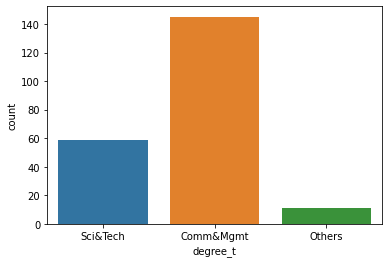

In [24]:
# lets see what type of degree most preferred

sns.countplot(data = camp, x = 'degree_t')

# we can see commerce and mgmt degree is taken by most of the students

In [25]:
# now we will see placed and not placed students with respect to degree_type 

In [26]:
camp['status'].value_counts()
# df_np.head()

Placed        148
Not Placed     67
Name: status, dtype: int64

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

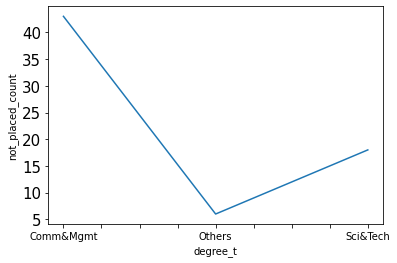

In [27]:
df_np= camp[camp['status'] !='Placed']
df_np.groupby('degree_t')['status'].size().plot(kind = 'line')
plt.ylabel('not_placed_count')
plt.yticks(fontsize = 15)


Text(0, 0.5, 'placed_count')

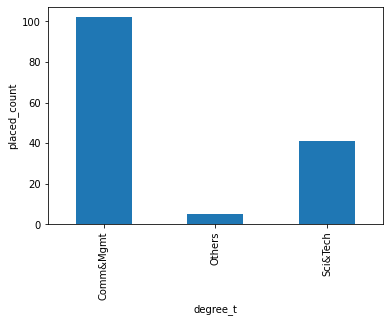

In [28]:
df_p= camp[camp['status'] =='Placed']
df_p.groupby('degree_t')['status'].size().plot(kind = 'bar')
plt.ylabel('placed_count')

**We can observe from the above graph that students whose degree type is commerce and mgmt are placed maximum**

**And again , maximum students are not placed from the degree type i.e is comm and mgmt**


# Does high school percentage affects comm&mgmt placement ??

<AxesSubplot:xlabel='degree_t', ylabel='hsc_p'>

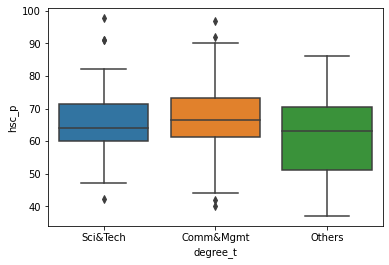

In [29]:
sns.boxplot(data = camp, x = 'degree_t', y = 'hsc_p')

# we could see the average percentage  of comm&mgmt is more than sci&tech
# but sciandtech has scored maximum percentage in highschool
# so we can conclcude highschool percentage dose'nt influence the placement 

#  Does degree percentage affects comm&mgmt placement ??

<AxesSubplot:xlabel='degree_t', ylabel='degree_p'>

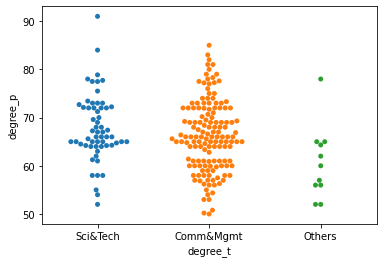

In [30]:
sns.swarmplot(data = camp, x = 'degree_t', y = 'degree_p')

# again sci and tech leads degree wise too 
# that means it dosent influence the placemt 

# does mba percentage influence the placement

<AxesSubplot:xlabel='degree_t', ylabel='degree_p'>

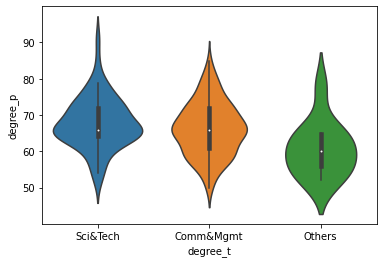

In [31]:
sns.violinplot(data = camp, x = 'degree_t', y = 'degree_p')

# and finally we can conclude that percentage dosent affect the placement 
# as comm and mgmt degree has highest placement but here we can again see that sci and tech got the highest degree percentage as well



# So we already observed that percentage is not affecting the placement 
# lets observe the other factors which might affect the Status being placed 

<AxesSubplot:xlabel='degree_t', ylabel='count'>

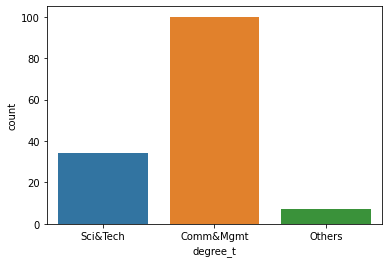

In [32]:
# Lets see is work experience affecting the placement , when students are not placed

work_ex_n= camp[camp['workex'] =='No']
sns.countplot(data = work_ex_n,x = 'degree_t')

<AxesSubplot:xlabel='degree_t'>

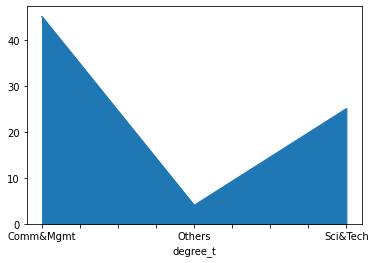

In [33]:
# Lets see is work experience affecting the placement , when students are placed

# work_ex = camp.groupby('degree_t')["workex"].size()
work_ex_y= camp[camp['workex'] =='Yes']
place_y = work_ex_y.groupby('degree_t')['workex'].size().plot(kind = 'area')
place_y
# px.area(work_ex)

**There are high number of students from comm&mgmt who already had a work ex**

In [34]:
# Lets check if there exists gender-discrimination with the respect  to placement 
group_gender = work_ex_y.groupby('gender')['workex'].size()
group_gender

# we could see males are placed more as compared to female

gender
F    22
M    52
Name: workex, dtype: int64

# lets check gender wise and degree wise students getting placed

In [35]:
placed = df_p.loc[:,['gender','degree_t',"status"]]
placed

,gender,degree_t,status
0,M,Sci&Tech,Placed
1,M,Sci&Tech,Placed
2,M,Comm&Mgmt,Placed
4,M,Comm&Mgmt,Placed
7,M,Sci&Tech,Placed
...,...,...,...
209,M,Comm&Mgmt,Placed
210,M,Comm&Mgmt,Placed
211,M,Sci&Tech,Placed
212,M,Comm&Mgmt,Placed


In [36]:
fig = px.bar(placed, x="degree_t",color = 'gender', barmode = 'group')
fig.show()

In [37]:
fig = px.bar(placed, x="status",color = 'gender', barmode = 'group')
fig.show()

In [38]:
# degree wise placed percentage

degree_count = camp.groupby('degree_t').size()
degree_count

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
dtype: int64

In [39]:
# I have used excel's pivot table to take calculate placed and not placed students with respect to each degree

# comm&mgmt = 43(NP) , 102(P) , 145(T)
# OTHERS = 6(NP), 5(P),         11(T)
# SCI&TECH = 18(NP), 41(P) ,    59(T)

# NOW LETS CREATE ARRAY --> [(102/145), (5/6), (41/59)]

In [40]:
PERCENTAGE = np.array([(102/145)*100, (5/6)*100, (41/59)*100])
PERCENTAGE

array([70.34482759, 83.33333333, 69.49152542])

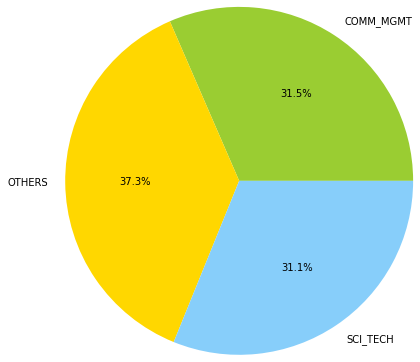

<Figure size 432x288 with 0 Axes>

In [43]:
# lets plot the placed percentage for each degree

labels = ['COMM_MGMT','OTHERS','SCI_TECH']
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(PERCENTAGE,labels=labels,autopct = '%1.1f%%',radius = 2,colors=colors)
plt.figure(facecolor = 'white')
plt.show()

# degree type of OTHERS > science and mgmt 
# hence we cant judge by only one attribute until and unless we dont compare that individual attribute with itself 